In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pickle, os, math
from parameters import *

lambda_prob = 0.0005

In [113]:
def prob_func(func_total_time):
    return 1 - math.exp(- func_total_time* lambda_prob)

def show_latency_figure(parameter = 'intensity 0.03, length 10000'):
    # parameter
    folder_list = sorted(os.listdir(os.getcwd()))
    fig, ax = plt.subplots()
    color_list = ['r', 'g','b', 'C0']
    i = 0
    latency = []
    for folder_name in folder_list:
        if folder_name.find(parameter) != -1 and folder_name.find('H_MIN 0.1') != -1:
            if folder_name.find('v num') != -1:
                continue
            file_name = os.path.abspath('.')+ '/' + folder_name + '/ego vehicle latency cdf.pkl'
            print(folder_name)
            folder_name_temp = folder_name.split(', ')
            re_name = ', '.join(folder_name_temp[:-1]) 
            with open(file_name,'rb') as file:
                latency.append(pickle.loads(file.read()))
            print('average time latency', np.sum(latency[i])/ len(latency[i]))
            ax.hist(np.array(latency[i]), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[i], label=re_name)
            i+=1
                
    # ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
    # ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
    # ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
    ax.legend(loc='lower right')
    fix_hist_step_vertical_line_at_end(ax)
    ax.set_title('latency CDF')
    ax.set_xlabel('latency')
    ax.set_ylabel("CDF")
    plt.show()
    
def show_prob_cdf_figure(parameter = 'intensity 0.03, length 10000'):
    # parameter
    folder_list = sorted(os.listdir(os.getcwd()))
    fig, ax = plt.subplots()
    color_list = ['r', 'g','b', 'C0']
    i = 0
    prob = []
    for folder_name in folder_list:
        if folder_name.find(parameter)!= -1 and folder_name.find('H_MIN 0.1') != -1:
            if folder_name.find('v num') != -1:
                continue
            file_name = os.path.abspath('.')+ '/' + folder_name + '/ego vehicle latency cdf.pkl'
            print(folder_name)
            folder_name_temp = folder_name.split(', ')
            re_name = ', '.join(folder_name_temp[:-1]) 
            temp_prob = []
            with open(file_name,'rb') as file:
                latency = pickle.loads(file.read())
            for time in latency:
                temp_prob.append(prob_func(time))
            prob.append(temp_prob)
            
            ax.hist(np.array(prob[i]), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[i], label=re_name)
            i+=1
                
    # ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
    # ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
    # ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
    ax.legend(loc='lower right')
    fix_hist_step_vertical_line_at_end(ax)
    ax.set_title('fail probability CDF')
    ax.set_xlabel('fail probability')
    ax.set_ylabel("CDF")
    plt.show()

intensity 0.03, length 10000, mode pso, H_MIN 0.1
297 290
average total time 158.79310344827587
fail_prob 0.07632643253557714
intensity 0.04, length 10000, mode pso, H_MIN 0.1
419 403
average total time 164.19354838709677
fail_prob 0.07881719234066353
intensity 0.05, length 10000, mode pso, H_MIN 0.1
545 513
average total time 171.8654970760234
fail_prob 0.08234405715121207
intensity 0.06, length 10000, mode pso, H_MIN 0.1
875 613
average total time 266.73246329526916
fail_prob 0.12485547221037607
[158.79310344827587, 164.19354838709677, 171.8654970760234, 266.73246329526916]
[0.07632643253557714, 0.07881719234066353, 0.08234405715121207, 0.12485547221037607]


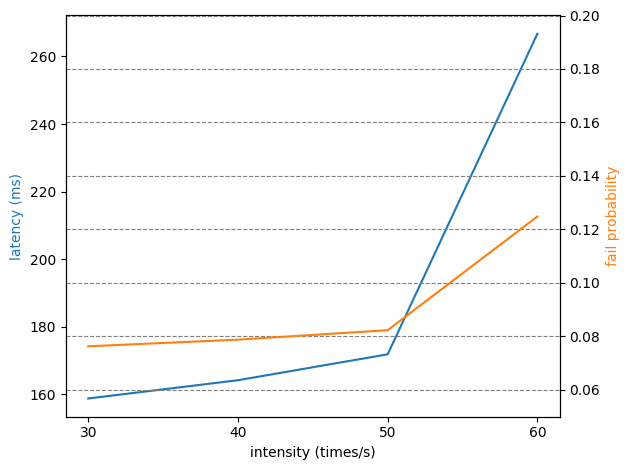

done


In [122]:
# latency and fail probability versus intensity
parameter = 'intensity'
length_name = '10000'
mode = 'pso'
h_min = '0.1'

length_name = ' ' + length_name
mode = ' ' + mode
folder_list = sorted(os.listdir(os.getcwd()))
# fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
latency_list = []
fail_prob_list = []
for folder_name in folder_list:
    folder_name_temp = folder_name.split(', ')
    
    if folder_name.find(mode) != -1 and folder_name.find(length_name) != -1 and folder_name_temp[3] == 'H_MIN 0.1':
        if folder_name.find('v num') != -1:# or folder_name.find('fpsomr') != -1 or folder_name.find('least') != -1:
            continue
        
        print(folder_name)
        folder_name_temp = folder_name.split(', ')
        
        finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
        all_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/all tasks.pkl'
        
        with open(finished_tasks_file_name,'rb') as file1:
            finished_tasks = pickle.loads(file1.read())
            
        with open(all_tasks_file_name,'rb') as file2:
            all_tasks = pickle.loads(file2.read())
        
        print(len(finished_tasks), len(all_tasks))
        
        # for f_tk in finished_tasks:
        #     print('tid %s, vid %s, total_time, %s' %(f_tk.tid, f_tk.vid, f_tk.total_time))
        tk_id_list = [0]
        tk_time_list = [0]
        for i, tk in enumerate(all_tasks):
            # print('count%s, tid %s' %(i+1, tk.tid))
            tk_id_list.append(tk.tid)
            tk_time_list.append(1000000)
        for f_tk in finished_tasks:
            if f_tk.total_time < tk_time_list[f_tk.tid]:
                tk_time_list[f_tk.tid] = f_tk.total_time
        average_total_time = np.sum(tk_time_list)/ (len(tk_time_list)-1 )
        
        fail_prob = 1 - math.exp(- average_total_time* lambda_prob)
        latency_list.append(average_total_time)
        fail_prob_list.append(fail_prob)
        print('average total time', average_total_time)
        print('fail_prob', fail_prob)

fig_size = (8,8)
font_size = 10

print(latency_list)
print(fail_prob_list)

intensity = [30 ,40, 50, 60]
fig, ax = plt.subplots() #figsize=fig_size

ax.plot(intensity, latency_list, label='latency', color='C0')
ax.set_xticks(np.arange(30, 70, 10))
ax.set_ylabel('latency (ms)', color='C0')

ax2 = ax.twinx()
ax2.plot(intensity, fail_prob_list, label='fail probability', color='C1')
ax2.set_ylim((0.05, 0.2))
ax2.set_ylabel('fail probability', color='C1')

ax.set_xlabel('intensity (times/s)')

# plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='both',color='gray')

plt.show()
print('done')


intensity 0.05, length 10000, mode pso, H_MIN 0.05
1060 522
average total time 291.2413793103448
fail_prob 0.1355144506851933
intensity 0.05, length 10000, mode pso, H_MIN 0.1
545 513
average total time 171.8654970760234
fail_prob 0.08234405715121207
intensity 0.05, length 10000, mode pso, H_MIN 0.15
515 513
average total time 175.5633528265107
fail_prob 0.08403916925092192
intensity 0.05, length 10000, mode pso, H_MIN 0.2
514 513
average total time 173.67056530214424
fail_prob 0.08317189930959723
intensity 0.05, length 10000, mode pso, H_MIN 0.25
514 513
average total time 175.87719298245614
fail_prob 0.0841828906192239
[291.2413793103448, 171.8654970760234, 175.5633528265107, 173.67056530214424, 175.87719298245614]
[0.1355144506851933, 0.08234405715121207, 0.08403916925092192, 0.08317189930959723, 0.0841828906192239]


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

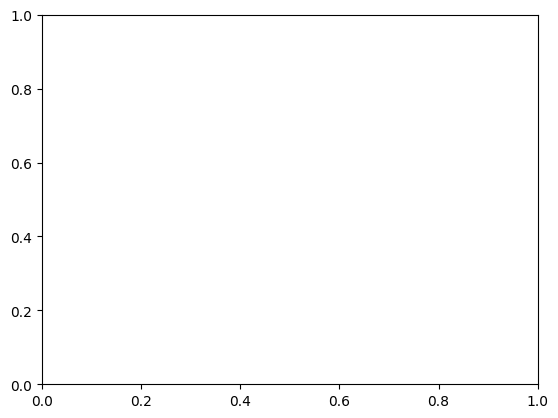

In [128]:
# latency and fail probability versus h_min
parameter = 'intensity'
length_name = '10000'
mode = 'pso'
h_min = '0.1'

length_name = ' ' + length_name
mode = ' ' + mode
folder_list = sorted(os.listdir(os.getcwd()))
# fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0']
i = 0
latency_list = []
fail_prob_list = []
for folder_name in folder_list:
    folder_name_temp = folder_name.split(', ')
    
    if folder_name_temp[0] == 'intensity 0.05' and folder_name_temp[1] == 'v num 20' and folder_name_temp[2] == 'mode pso':
        
        print(folder_name)
        folder_name_temp = folder_name.split(', ')
        
        finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
        all_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/all tasks.pkl'
        
        with open(finished_tasks_file_name,'rb') as file1:
            finished_tasks = pickle.loads(file1.read())
            
        with open(all_tasks_file_name,'rb') as file2:
            all_tasks = pickle.loads(file2.read())
        
        print(len(finished_tasks), len(all_tasks))
        
        # for f_tk in finished_tasks:
        #     print('tid %s, vid %s, total_time, %s' %(f_tk.tid, f_tk.vid, f_tk.total_time))
        tk_id_list = [0]
        tk_time_list = [0]
        for i, tk in enumerate(all_tasks):
            # print('count%s, tid %s' %(i+1, tk.tid))
            tk_id_list.append(tk.tid)
            tk_time_list.append(1000000)
        for f_tk in finished_tasks:
            if f_tk.total_time < tk_time_list[f_tk.tid]:
                tk_time_list[f_tk.tid] = f_tk.total_time
        average_total_time = np.sum(tk_time_list)/ (len(tk_time_list)-1 )
        
        fail_prob = 1 - math.exp(- average_total_time* lambda_prob)
        latency_list.append(average_total_time)
        fail_prob_list.append(fail_prob)
        print('average total time', average_total_time)
        print('fail_prob', fail_prob)

fig_size = (8,8)
font_size = 10

print(latency_list)
print(fail_prob_list)

h_min_list = [0.07, 0.08 ,0.1, 0.15, 0.2, 0.25]
fig, ax = plt.subplots() #figsize=fig_size

ax.plot(h_min_list, latency_list, label='latency', color='C0')
# ax.set_xticks(np.arange(0.05, 0.3, 0.05))
ax.set_ylabel('latency (ms)', color='C0')

ax2 = ax.twinx()
ax2.plot(h_min_list, fail_prob_list, label='fail probability', color='C1')
ax2.set_ylim((0.05, 0.2))
ax2.set_ylabel('fail probability', color='C1')

ax.set_xlabel('allowed fail probability')

# plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='both',color='gray')

plt.show()
print('done')

intensity 0.03, length 10000, mode fpsomr, H_MIN 0.1
average time latency 235.84174311926606
intensity 0.03, length 10000, mode leastr, H_MIN 0.1
average time latency 357.40845070422534
intensity 0.03, length 10000, mode psor, H_MIN 0.1
average time latency 159.57575757575756


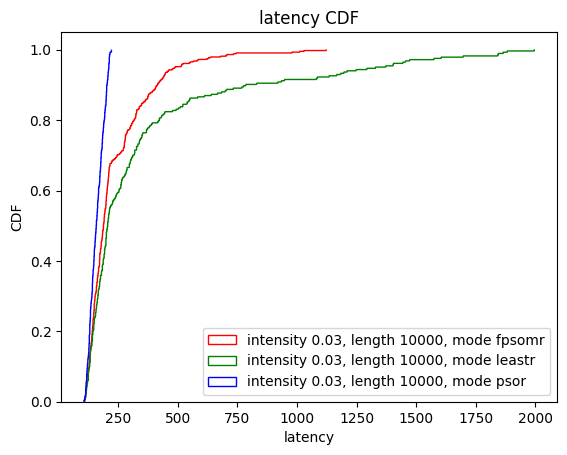

intensity 0.03, length 10000, mode fpsomr, H_MIN 0.1
intensity 0.03, length 10000, mode leastr, H_MIN 0.1
intensity 0.03, length 10000, mode psor, H_MIN 0.1


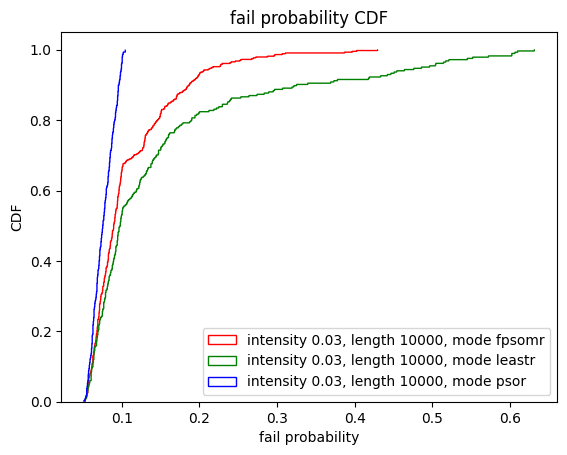

In [114]:
show_latency_figure()
show_prob_cdf_figure()

intensity 0.05, length 10000, mode fpsomr, H_MIN 0.1
average time latency 299.7226277372263
intensity 0.05, length 10000, mode fpsomr, H_MIN 0.15
average time latency 299.7226277372263
intensity 0.05, length 10000, mode least, H_MIN 0.1
average time latency 460.7987927565392
intensity 0.05, length 10000, mode least, H_MIN 0.15
average time latency 460.7987927565392
intensity 0.05, length 10000, mode least, kkt False, H_MIN 0.1
average time latency 460.7987927565392


IndexError: list index out of range

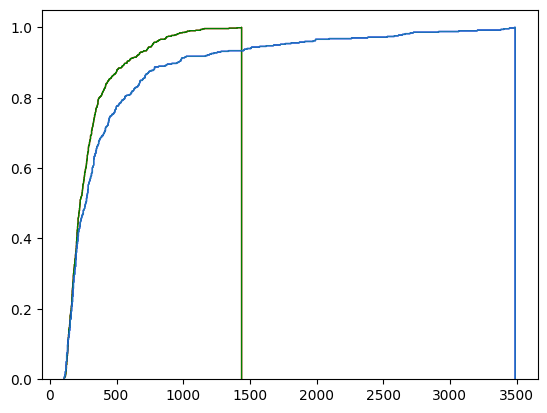

In [127]:
parameter = 'intensity 0.05, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.05, length 10000, mode fpsomr
average time latency 299.7226277372263
intensity 0.05, length 10000, mode least
average time latency 460.7987927565392
intensity 0.05, length 10000, mode pso
average time latency 177.39633027522936


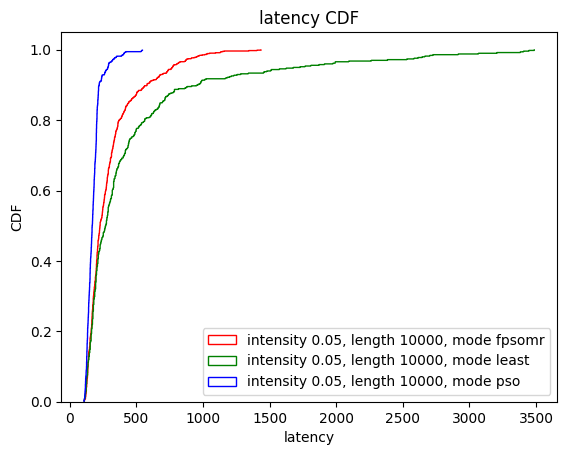

intensity 0.05, length 10000, mode fpsomr
intensity 0.05, length 10000, mode least
intensity 0.05, length 10000, mode pso


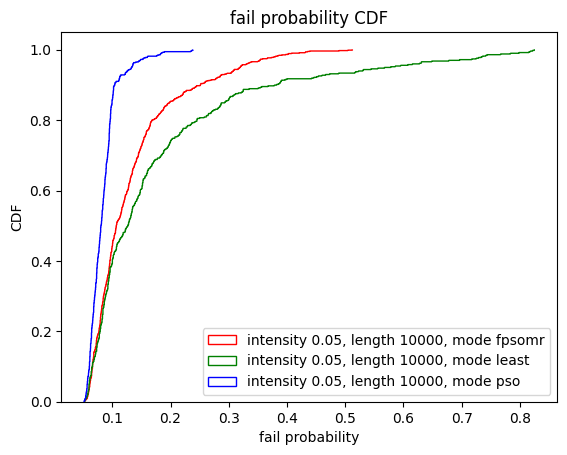

In [84]:
parameter = 'intensity 0.05, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.05, length 60000, mode fpsomr
average time latency 315.3450861195542
intensity 0.05, length 60000, mode least
average time latency 502.6866981769075
intensity 0.05, length 60000, mode pso
average time latency 178.8898623279099


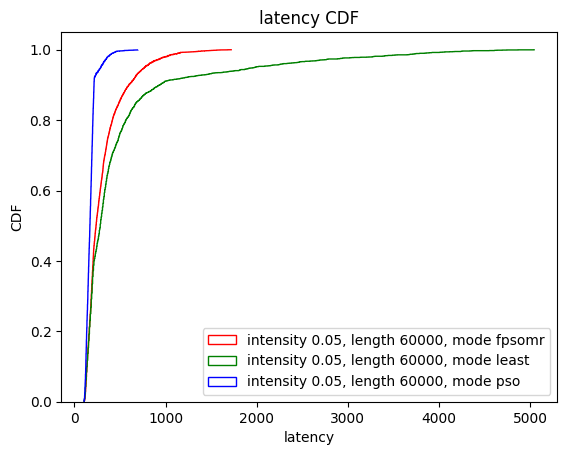

intensity 0.05, length 60000, mode fpsomr
intensity 0.05, length 60000, mode least
intensity 0.05, length 60000, mode pso


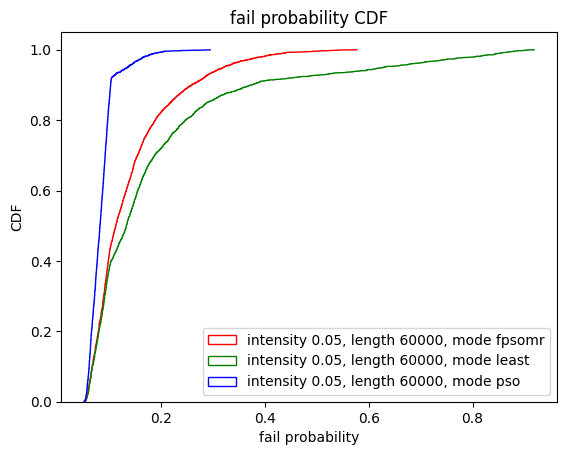

In [85]:
parameter = 'intensity 0.05, length 60000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.06, length 10000, mode fpsomr
average time latency 477.9613152804642
intensity 0.06, length 10000, mode least
average time latency 577.3666666666667
intensity 0.06, length 10000, mode pso
average time latency 316.21714285714285


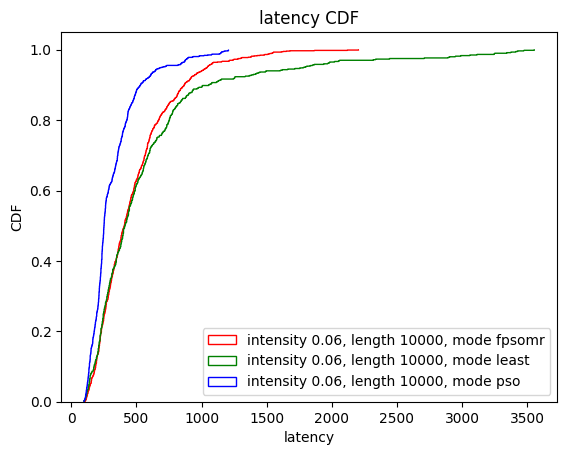

intensity 0.06, length 10000, mode fpsomr
intensity 0.06, length 10000, mode least
intensity 0.06, length 10000, mode pso


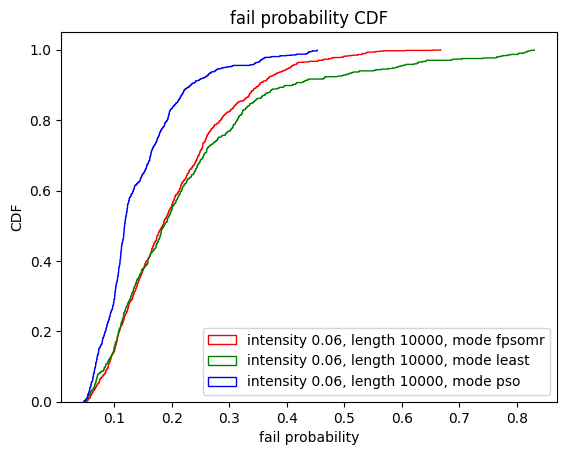

In [86]:
parameter = 'intensity 0.06, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)